<a href="https://colab.research.google.com/github/Sourav-Manik/AI-Assignments/blob/main/Assignment_6_Clustering_(Crime_Dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [ ]:
df=pd.read_csv("/content/crime_data.csv")
df.tail()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
45,Virginia,8.5,156,63,20.7
46,Washington,4.0,145,73,26.2
47,West Virginia,5.7,81,39,9.3
48,Wisconsin,2.6,53,66,10.8
49,Wyoming,6.8,161,60,15.6


In [ ]:
df = df.rename({'Unnamed: 0': 'City'}, axis=1)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB
None


#Hierarchical_Clustering

In [ ]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
# Normalized data frame
df_norm = norm_func(df.iloc[:,1:])
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


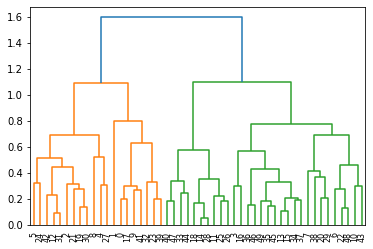

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [ ]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')
# save clusters for chart
y_hc = hc.fit_predict(df_norm)

In [ ]:
y_hc

array([0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       1, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 1, 1])

In [ ]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
df['h_clusterid'] = Clusters
df.head()

,City,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3


In [ ]:
df.h_clusterid.value_counts()

1    20
3    12
2    10
0     8
Name: h_clusterid, dtype: int64

Hierarchical_Clustering

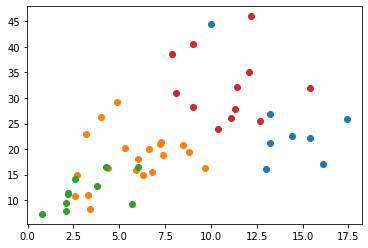

In [ ]:
for i in set(df['h_clusterid']):
  plt.scatter(df[df['h_clusterid']==i].iloc[:,1],df[df['h_clusterid']==i].iloc[:,4])

In [ ]:
# Inferences - As per dendrogram the total cluster formed is 3. As the data points a less, Hierarchical Clustering can be used.

#K-means Clustering

In [ ]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:,1:])


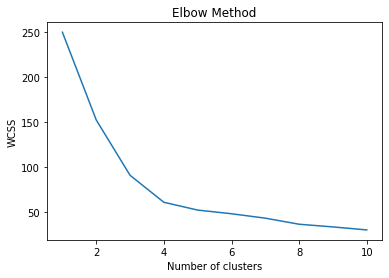

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=0)
clusters_new.fit(scaled_df)

KMeans(n_clusters=4, random_state=0)

In [ ]:
clusters_new.labels_

array([2, 2, 1, 2, 1, 1, 0, 0, 1, 2, 0, 3, 1, 0, 3, 0, 0, 2, 3, 1, 0, 1,
       0, 2, 1, 3, 3, 1, 3, 0, 1, 1, 2, 3, 0, 0, 0, 0, 0, 2, 3, 2, 1, 0,
       3, 0, 0, 3, 0, 0], dtype=int32)

In [ ]:
#Assign clusters to the data set
df['Kmean_clusters_id'] = clusters_new.labels_

In [ ]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-0.5184383 , -0.50299157,  0.443479  , -0.34572893, -0.50756473],
       [ 0.71788585,  1.04432228,  0.89281033,  1.18827715,  1.4446073 ],
       [ 1.32475684,  0.90930557, -0.86737678,  0.29612861, -1.37519674],
       [-1.0687114 , -1.11587777, -1.13334338, -1.03556337,  0.46852129]])

In [ ]:
df.groupby('Kmean_clusters_id').agg(['mean']).reset_index()

,Kmean_clusters_id,Murder,Assault,UrbanPop,Rape,h_clusterid
,,mean,mean,mean,mean,mean
0,0,5.552632,129.263158,71.894737,18.026316,1.000000
1,1,10.883333,256.916667,78.333333,32.250000,3.000000
2,2,13.500000,245.777778,53.111111,23.977778,0.111111
3,3,3.180000,78.700000,49.300000,11.630000,2.000000


In [ ]:
df.tail()

,City,Murder,Assault,UrbanPop,Rape,h_clusterid,Kmean_clusters_id
45,Virginia,8.5,156,63,20.7,1,0
46,Washington,4.0,145,73,26.2,1,0
47,West Virginia,5.7,81,39,9.3,2,3
48,Wisconsin,2.6,53,66,10.8,1,0
49,Wyoming,6.8,161,60,15.6,1,0


In [ ]:
df.Kmean_clusters_id.value_counts()

0    19
1    12
3    10
2     9
Name: Kmean_clusters_id, dtype: int64

In [ ]:
# Inferences - As per elbow method it seems that 4 is the optimum number of cluster. All the cluster are evenly distributed.

K-means Cluster

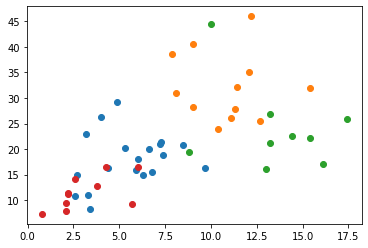

In [ ]:
for i in set(df['Kmean_clusters_id']):
  plt.scatter(df[df['Kmean_clusters_id']==i].iloc[:,1],df[df['Kmean_clusters_id']==i].iloc[:,4])

#DB scan clustering

In [ ]:
dbscan = DBSCAN(eps=2, min_samples=7)
class_prediction = dbscan.fit(scaled_df)

In [ ]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1,  1,  0,  1,  1,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  1,  0,  1,  0,  0,  1,  0,  0,  1,  0,  0,  1,  1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0])

In [ ]:
cl=pd.DataFrame(dbscan.labels_,columns=['DBscan_Cluster_ID'])

In [ ]:
cl.head()

,DBscan_Cluster_ID
0,0
1,-1
2,1
3,0
4,1


In [ ]:
df=pd.concat([df,cl],axis=1)

In [ ]:
df.tail()

,City,Murder,Assault,UrbanPop,Rape,h_clusterid,Kmean_clusters_id,DBscan_Cluster_ID
45,Virginia,8.5,156,63,20.7,1,0,0
46,Washington,4.0,145,73,26.2,1,0,0
47,West Virginia,5.7,81,39,9.3,2,3,0
48,Wisconsin,2.6,53,66,10.8,1,0,0
49,Wyoming,6.8,161,60,15.6,1,0,0


In [ ]:
df.DBscan_Cluster_ID.value_counts()

 0    37
 1    12
-1     1
Name: DBscan_Cluster_ID, dtype: int64

In [ ]:
# Inferences - DB scan cluster shows 2 clusters (0 and 1) and a outlier(-1).

DBscan Cluster

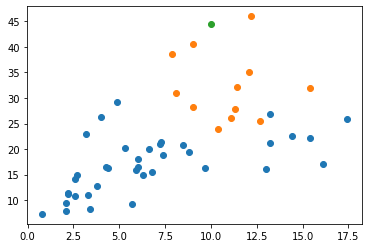

In [ ]:
for i in set(df['DBscan_Cluster_ID']):
  plt.scatter(df[df['DBscan_Cluster_ID']==i].iloc[:,1],df[df['DBscan_Cluster_ID']==i].iloc[:,4])